In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/CTG.xlsx', sheet_name='Data')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,22,Unnamed: 44,23
0,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1


Rimpiazziamo l'header del dataframe con la prima riga.

In [5]:
df.columns = df.iloc[0]

In [6]:
df = df[1:]
df.head(5)

,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
5,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1


# **Exploratory Data Analysis**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 1 to 2129
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   object 
 1   e         2126 non-null   object 
 2   AC        2126 non-null   object 
 3   FM        2127 non-null   object 
 4   UC        2127 non-null   object 
 5   DL        2128 non-null   object 
 6   DS        2128 non-null   object 
 7   DP        2128 non-null   object 
 8   DR        2128 non-null   object 
 9   nan       0 non-null      float64
 10  LB        2126 non-null   object 
 11  AC        2126 non-null   object 
 12  FM        2127 non-null   object 
 13  UC        2127 non-null   object 
 14  DL        2128 non-null   object 
 15  DS        2128 non-null   object 
 16  DP        2128 non-null   object 
 17  ASTV      2127 non-null   object 
 18  MSTV      2127 non-null   object 
 19  ALTV      2127 non-null   object 
 20  MLTV      2127 non-null   obje

In [8]:
# Let's make a copy of the df, so as to keep track of the original
df2 = df.copy()

Alcune features contengono uno o due valori in più di tutte le altre, come è possibile osservare nella coda del df:

In [9]:
df2.tail()

,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
2125,1576,3049,1,0,9,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2126,2796,3415,1,1,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,1,NaN,1
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,...,72,332,252,107,69,197,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,564,23,16,1,4,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminiamo dunque le ultime tre righe in quanto riempite per la maggior parte da valori NaN. Inoltre, eliminiamo tutte le colonne con solo valori NaN. 



In [10]:
# Drop last three lines
df2 = df2.iloc[:-3]
# Drop columns with nan values only
df2 = df2.dropna(axis=1, how='all')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 1 to 2126
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   b         2126 non-null   object
 1   e         2126 non-null   object
 2   AC        2126 non-null   object
 3   FM        2126 non-null   object
 4   UC        2126 non-null   object
 5   DL        2126 non-null   object
 6   DS        2126 non-null   object
 7   DP        2126 non-null   object
 8   DR        2126 non-null   object
 9   LB        2126 non-null   object
 10  AC        2126 non-null   object
 11  FM        2126 non-null   object
 12  UC        2126 non-null   object
 13  DL        2126 non-null   object
 14  DS        2126 non-null   object
 15  DP        2126 non-null   object
 16  ASTV      2126 non-null   object
 17  MSTV      2126 non-null   object
 18  ALTV      2126 non-null   object
 19  MLTV      2126 non-null   object
 20  Width     2126 non-null   object
 21  Min       2126

In questo dataset compaiono sia i dati grezzi sia le features elaborate a partire da essi. Procediamo dunque ad eliminare le colonne non corrispondenti ad alcuna feature, seguendo le indicazioni fornite nel dataset.

In [12]:
# Drop first nine columns
df2 = df2.iloc[:, 9:]

# Drop other irrelevant columns
columns_to_drop = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']
df2 = df2.drop(columns=columns_to_drop)

In [13]:
df2.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120,0,0,0,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 1 to 2126
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LB        2126 non-null   object
 1   AC        2126 non-null   object
 2   FM        2126 non-null   object
 3   UC        2126 non-null   object
 4   DL        2126 non-null   object
 5   DS        2126 non-null   object
 6   DP        2126 non-null   object
 7   ASTV      2126 non-null   object
 8   MSTV      2126 non-null   object
 9   ALTV      2126 non-null   object
 10  MLTV      2126 non-null   object
 11  Width     2126 non-null   object
 12  Min       2126 non-null   object
 13  Max       2126 non-null   object
 14  Nmax      2126 non-null   object
 15  Nzeros    2126 non-null   object
 16  Mode      2126 non-null   object
 17  Mean      2126 non-null   object
 18  Median    2126 non-null   object
 19  Variance  2126 non-null   object
 20  Tendency  2126 non-null   object
 21  NSP       2126

In [15]:
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
5,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1


Per finire, trasformiamo il tipo (type) di ogni colonna in float64.

In [ ]:
df2 = df2.astype(float)
df2.info()

Come sono distribuite le classi NSP che vogliamo predirre?

In [16]:
df_count = df2["NSP"].replace(
    {1.0: "Normal", 2.0: "Suspect", 3.0: "Pathologic"})

count = df_count.value_counts()
count

Normal        1655
Suspect        295
Pathologic     176
Name: NSP, dtype: int64

Andiamo adesso a visualizzare i grafici a barra delle varie features.

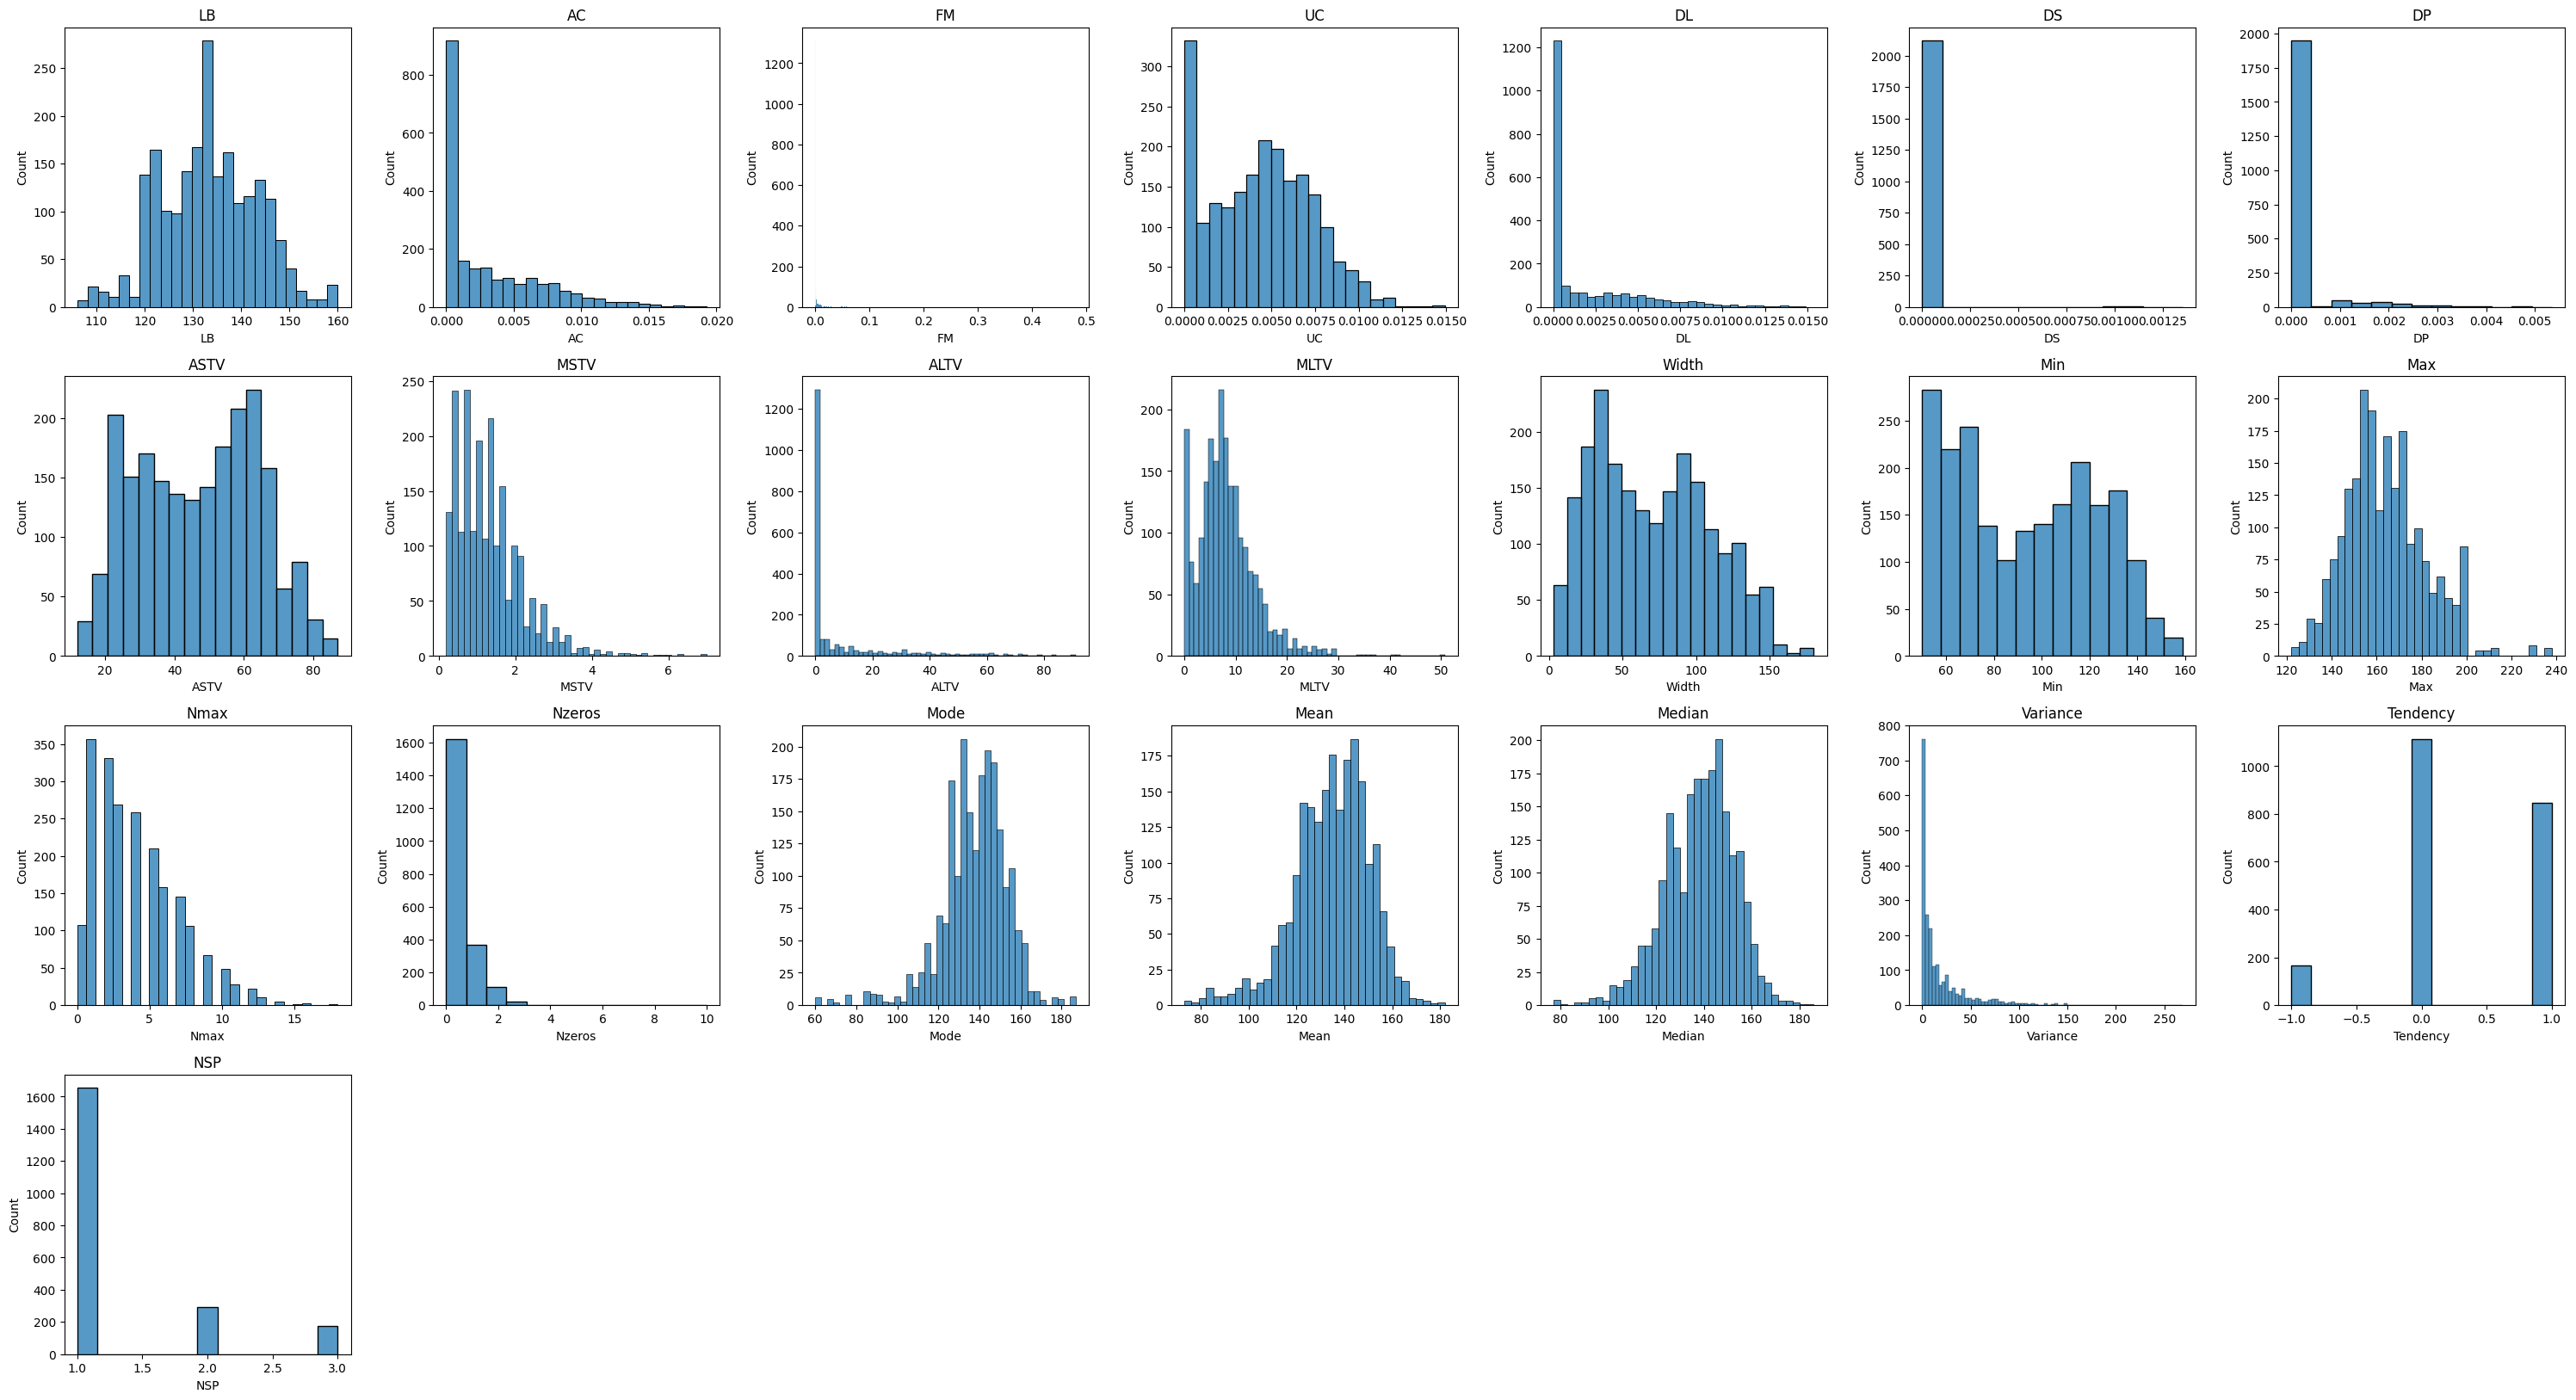

In [17]:
plt.figure(figsize=(30, 20))

for i, col in enumerate(df2.columns):
    plt.subplot(5, 7, i + 1)
    sns.histplot(df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [18]:
df["FM"].describe()

,FM,FM
count,2127,2127.0
unique,96,696.0
top,0,0.0
freq,1311,1311.0


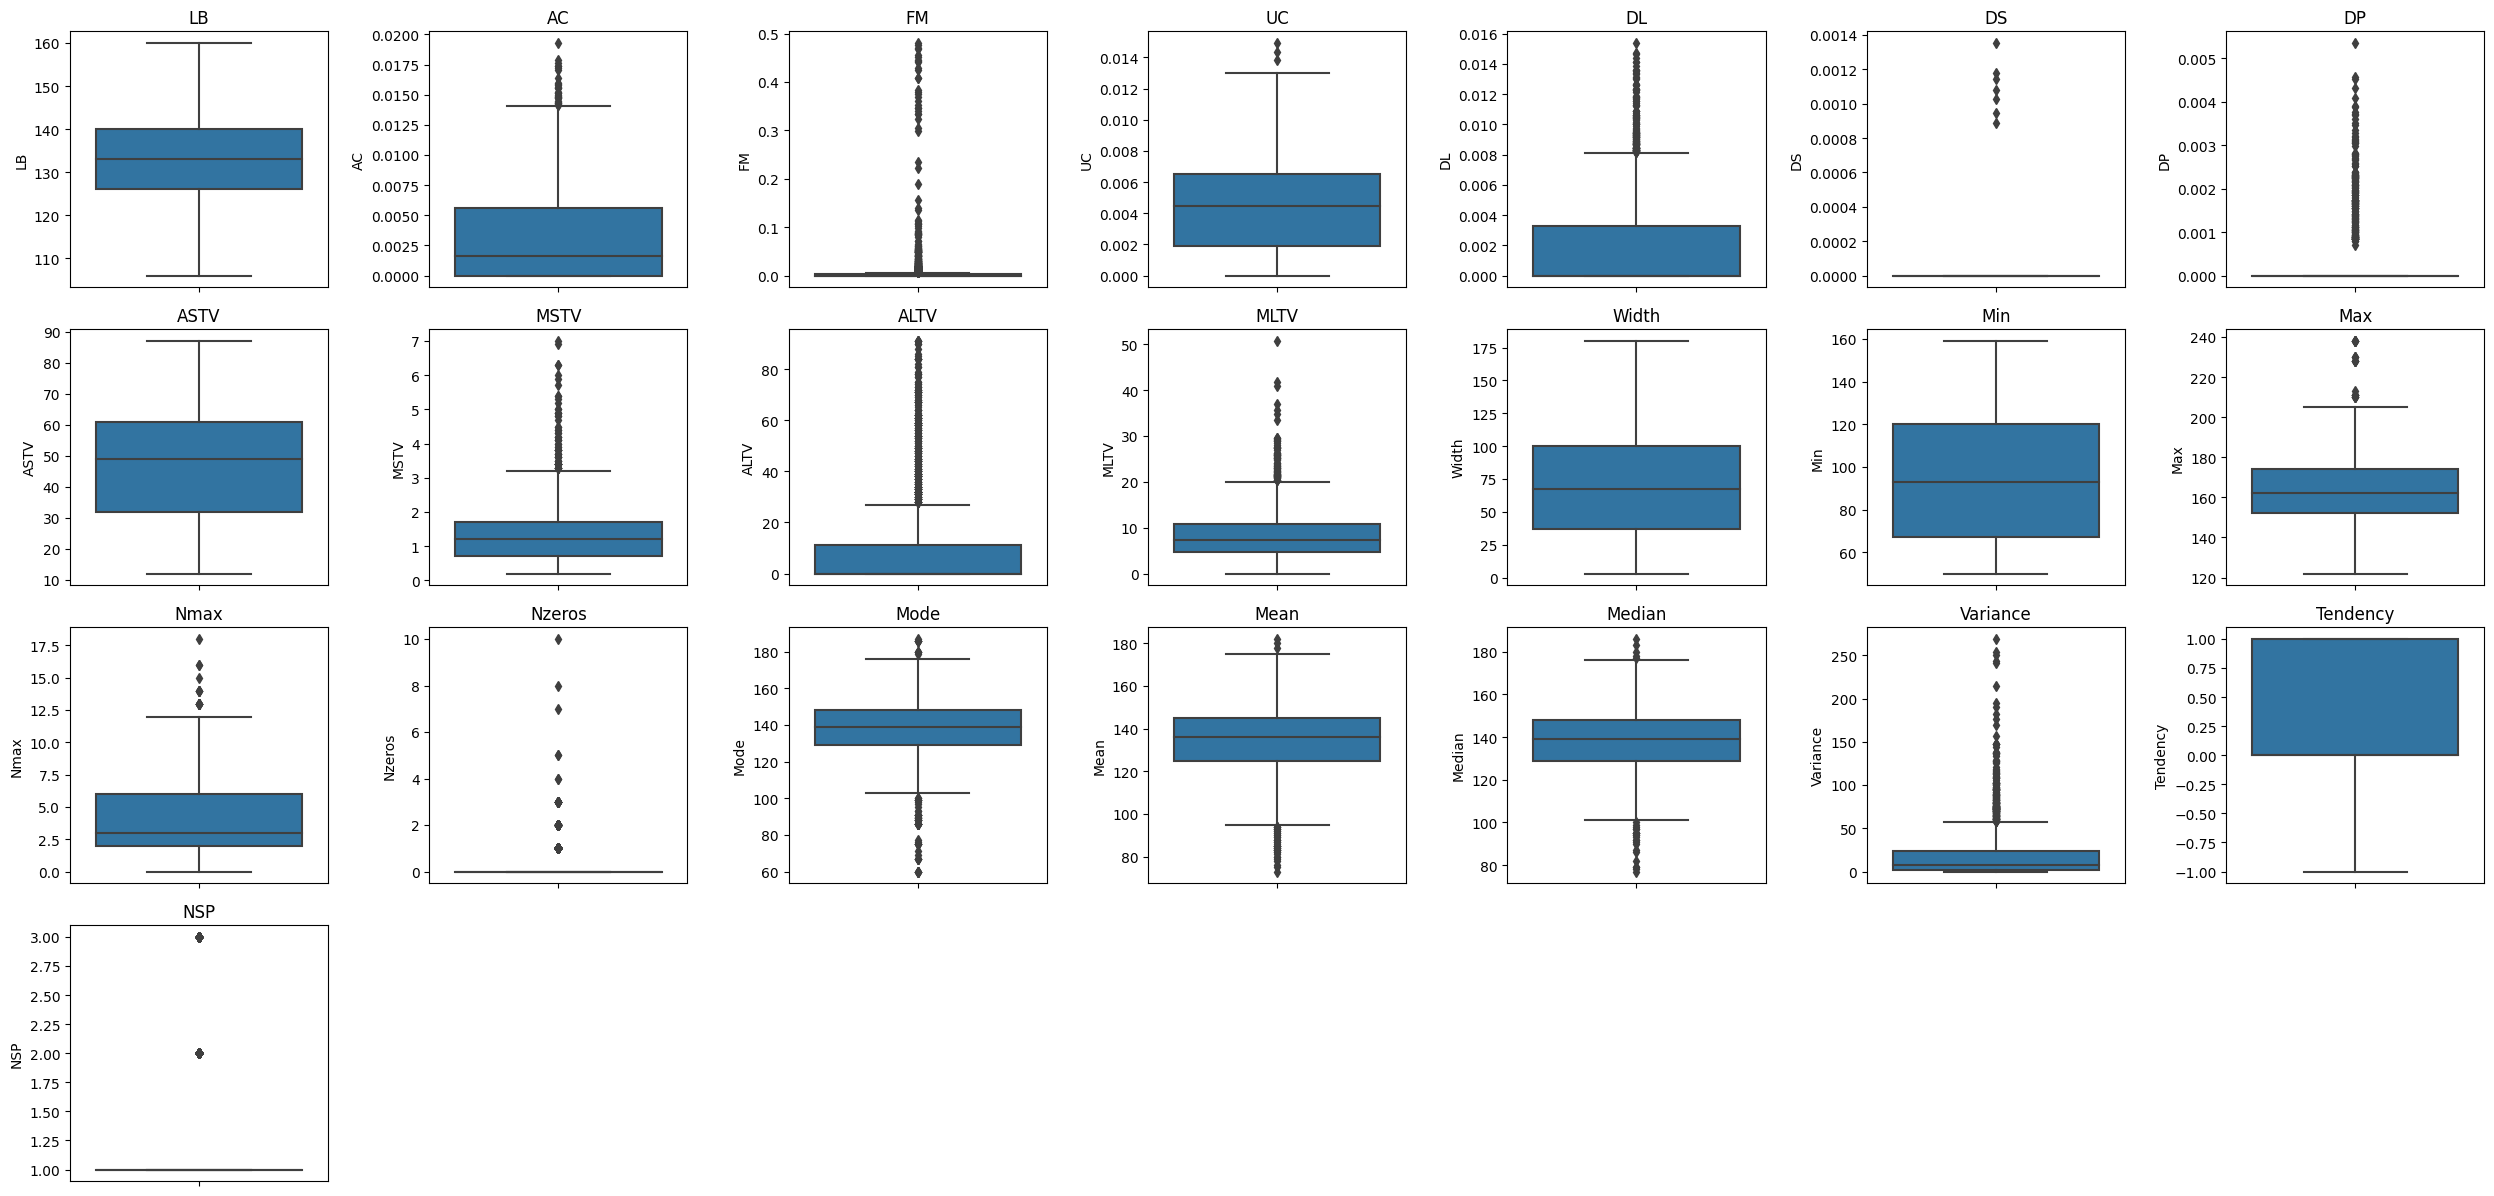

In [35]:
plt.figure(figsize=(25, 15))

for i, col in enumerate(df2.columns):
    plt.subplot(5, 7, i + 1)
    sns.boxplot(data=df2, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

# **Preprocessing**

Andiamo a separare la variabile target dal resto del dataframe:

In [50]:
y = df2['NSP']
X = df2.drop('NSP', axis=1)

In [51]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
2,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
3,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
4,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
5,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


L'operazione successiva è quella di scalare le features, in modo da rendere il loro trattamento uniforme. 
Lo faremo all'interno di una pipeline che instanzierù un KNeighbors Classifier

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# **Modelling**

In [71]:
cv = GridSearchCV(pipeline, 
                  param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [74]:
print(cv.best_score_)
print(cv.best_params_)

0.9152941176470588
{'knn__n_neighbors': 1}


In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, cv.predict(X_test)))

0.9014084507042254


In [ ]:
# Let's print a confusion matrix